In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# load both files
clean = pd.read_csv("out/pitchfork_reviews_clean_MAO.csv")
merged = pd.read_csv("merged_data.csv")

print("clean shape:", clean.shape)
print("merged shape:", merged.shape)

clean shape: (8926, 15)
merged shape: (8926, 18)


In [12]:
df = merged.copy()
df["main_genre"] = clean["main_genre"]      # bring over main_genre

df.head()

,artist,album,score,genre,label,reviewer,album_year,review_date,length,url,artist_id,followers_count,review_datetime,review_year,reviewer_reviews,review_release_difference,artist_reviews,artist_review_number,main_genre
0,!!!,Shake the Shudder,7.3,Rock,Warp,Stuart Berman,2017.0,2017-05-24,726,https://www.pitchfork.com/reviews/albums/23257...,2Jc4AEeBTE47KwuKgYOtcL,362467.0,2017-05-24,2017,213,0.0,3.0,1.0,Rock
1,!!!,Wallop,7.2,Rock,Warp,Jesse Dorris,2019.0,2019-09-07,851,https://www.pitchfork.com/reviews/albums/-wallop/,2Jc4AEeBTE47KwuKgYOtcL,362467.0,2019-09-07,2019,61,0.0,3.0,2.0,Rock
2,!!!,Let It Be Blue,7.4,Rock,Warp,Brian Howe,2022.0,2022-05-12,884,https://www.pitchfork.com/reviews/albums/let-i...,2Jc4AEeBTE47KwuKgYOtcL,362467.0,2022-05-12,2022,72,0.0,3.0,3.0,Experimental
3,$ilkMoney,"I Don’t Give a Fuck About This Rap Shit, Imma ...",8.4,Rap,DB$B,Dylan Green,2022.0,2022-11-23,957,https://www.pitchfork.com/reviews/albums/silkm...,6hj2p7pzusn5Fcdi35Yedr,72212.0,2022-11-23,2022,149,0.0,2.0,1.0,Electronic
4,$ilkMoney,WHO WATERS THE WILTING GIVING TREE ONCE THE LE...,8.0,Rap,Lex,Dash Lewis,2025.0,2025-07-18,1009,https://www.pitchfork.com/reviews/albums/silkm...,6hj2p7pzusn5Fcdi35Yedr,72212.0,2025-07-18,2025,53,0.0,2.0,2.0,Electronic


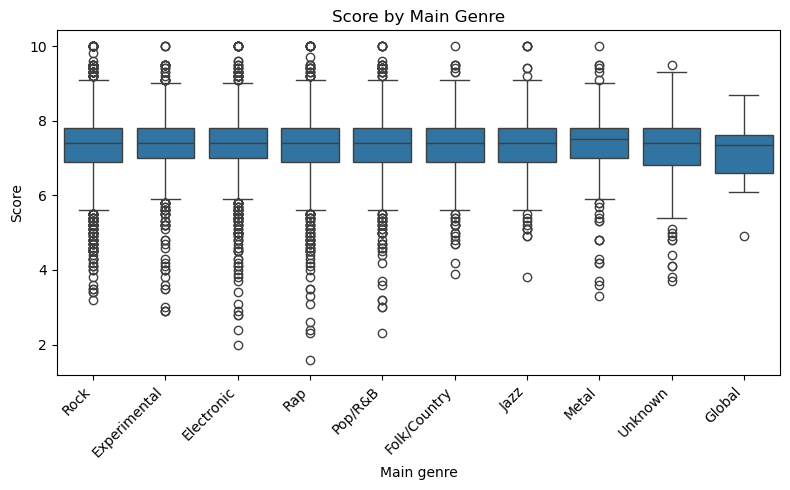

In [13]:
valid_genres = df["main_genre"].value_counts()
valid_genres = valid_genres[valid_genres >= 20].index  # keep only big genres

filtered_df = df[df["main_genre"].isin(valid_genres)]

sns.boxplot(data=filtered_df, x="main_genre", y="score")
plt.title("Score by Main Genre")
plt.xlabel("Main genre")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

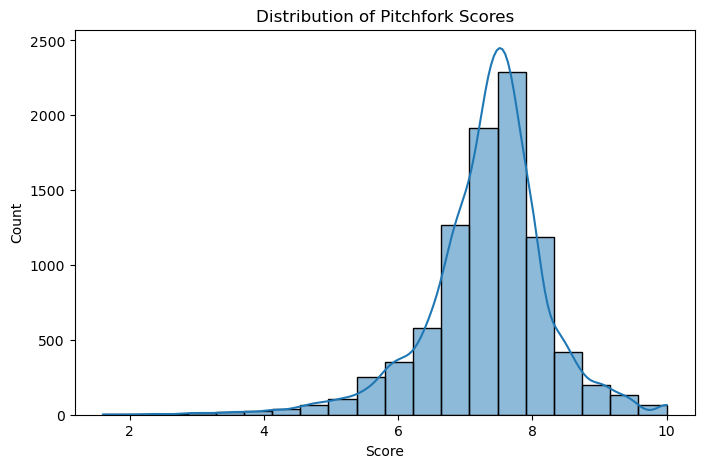

In [15]:
# Distributio of Scores 
sns.histplot(data=df, x="score", bins=20, kde=True)
plt.title("Distribution of Pitchfork Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

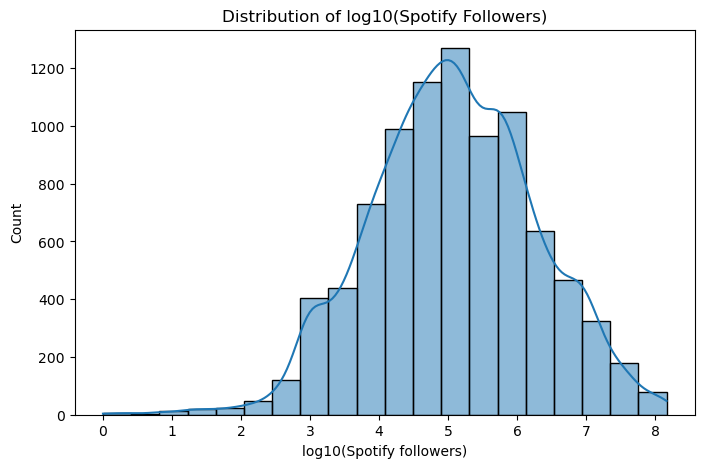

In [16]:
# Distribution of log Spotify followers
import numpy as np

followers_df = df[df["followers_count"] > 0].copy()
followers_df["log_followers"] = np.log10(followers_df["followers_count"])

sns.histplot(data=followers_df, x="log_followers", bins=20, kde=True)
plt.title("Distribution of log10(Spotify Followers)")
plt.xlabel("log10(Spotify followers)")
plt.ylabel("Count")
plt.show()

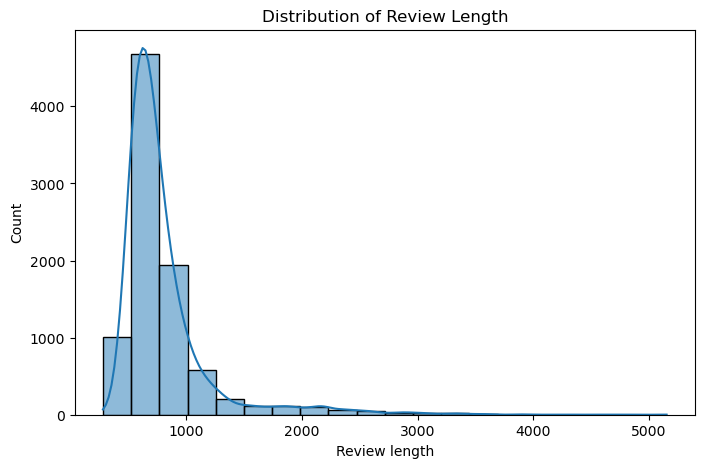

In [17]:
# Distribution of review length
sns.histplot(data=df, x="length", bins=20, kde=True)
plt.title("Distribution of Review Length")
plt.xlabel("Review length")
plt.ylabel("Count")
plt.show()

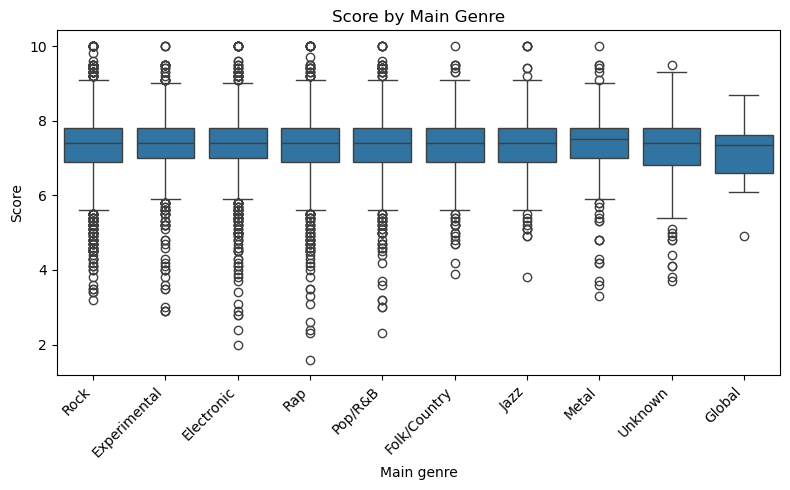

In [18]:
# Boxplots of score by genre (using main_genre)
valid_genres = df["main_genre"].value_counts()
valid_genres = valid_genres[valid_genres >= 20].index

filtered_df = df[df["main_genre"].isin(valid_genres)]

sns.boxplot(data=filtered_df, x="main_genre", y="score")
plt.title("Score by Main Genre")
plt.xlabel("Main genre")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

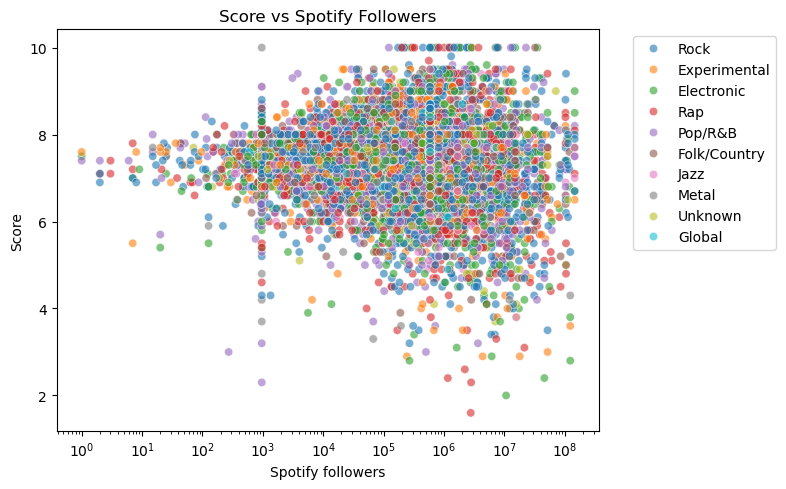

In [19]:
# Scatterplots
# a) Score vs followers

followers_df = df[df["followers_count"] > 0].copy()

sns.scatterplot(
    data=followers_df,
    x="followers_count",
    y="score",
    hue="main_genre",
    alpha=0.6
)
plt.title("Score vs Spotify Followers")
plt.xlabel("Spotify followers")
plt.ylabel("Score")
plt.xscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

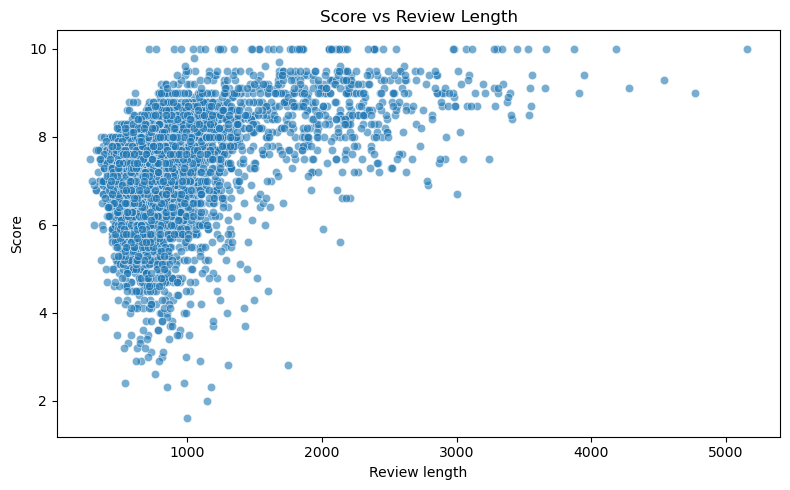

In [20]:
# b) Score vs review length

sns.scatterplot(
    data=df,
    x="length",
    y="score",
    alpha=0.6
)
plt.title("Score vs Review Length")
plt.xlabel("Review length")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

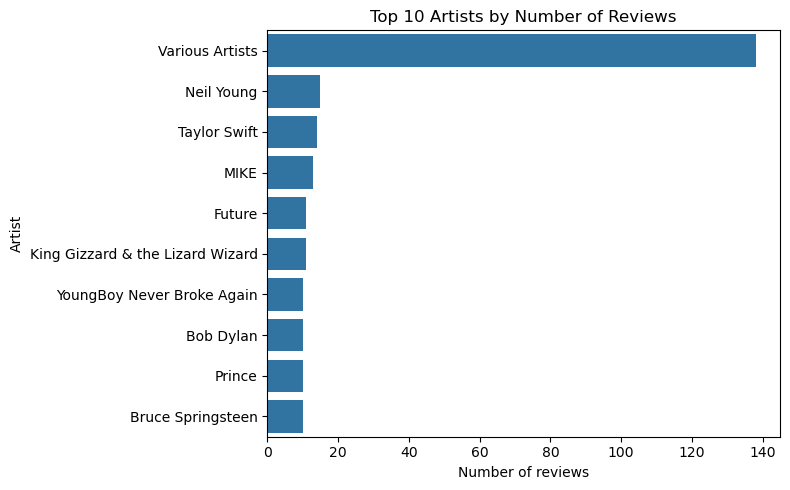

In [21]:
# Top artists by number of reviews
top_artists_by_n = (
    df.groupby("artist")
      .size()
      .sort_values(ascending=False)
      .head(10)
      .reset_index(name="n_reviews")
)

sns.barplot(data=top_artists_by_n, x="n_reviews", y="artist")
plt.title("Top 10 Artists by Number of Reviews")
plt.xlabel("Number of reviews")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()

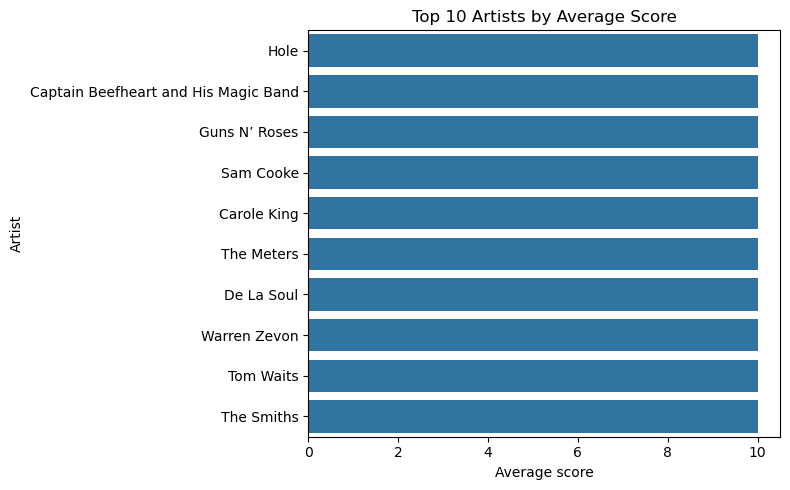

In [22]:
# Top artists by average score
top_artists_by_score = (
    df.groupby("artist")["score"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

sns.barplot(data=top_artists_by_score, x="score", y="artist")
plt.title("Top 10 Artists by Average Score")
plt.xlabel("Average score")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()

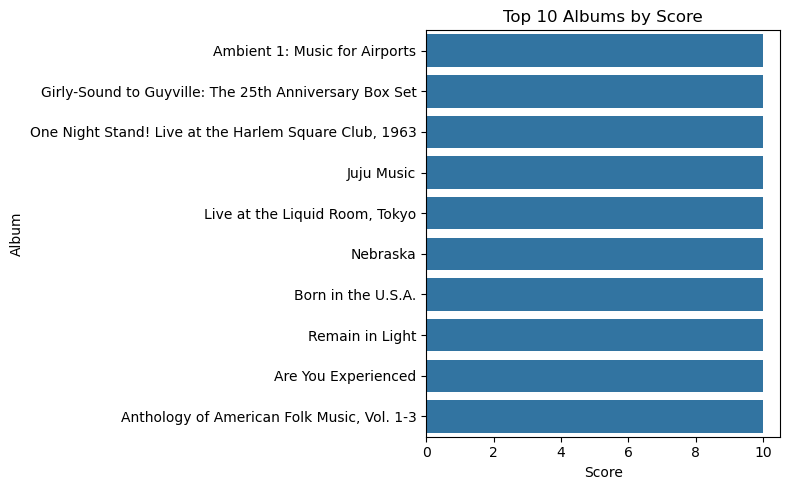

,artist,album,score
1075,Brian Eno,Ambient 1: Music for Airports,10.0
4410,Liz Phair,Girly-Sound to Guyville: The 25th Anniversary ...,10.0
6519,Sam Cooke,One Night Stand! Live at the Harlem Square Clu...,10.0
4030,King Sunny Adé,Juju Music,10.0
3434,Jeff Mills,"Live at the Liquid Room, Tokyo",10.0
1114,Bruce Springsteen,Nebraska,10.0
1111,Bruce Springsteen,Born in the U.S.A.,10.0
7244,Talking Heads,Remain in Light,10.0
7512,The Jimi Hendrix Experience,Are You Experienced,10.0
8027,Various Artists,"Anthology of American Folk Music, Vol. 1-3",10.0


In [23]:
# Top albums by score
top_albums = (
    df.groupby(["artist", "album"])["score"]
      .max()
      .reset_index()
      .sort_values("score", ascending=False)
      .head(10)
)

sns.barplot(data=top_albums, x="score", y="album")
plt.title("Top 10 Albums by Score")
plt.xlabel("Score")
plt.ylabel("Album")
plt.tight_layout()
plt.show()

top_albums

     main_genre  count
0          Rock   2781
1           Rap   1471
2    Electronic   1387
3       Pop/R&B   1162
4  Experimental    909


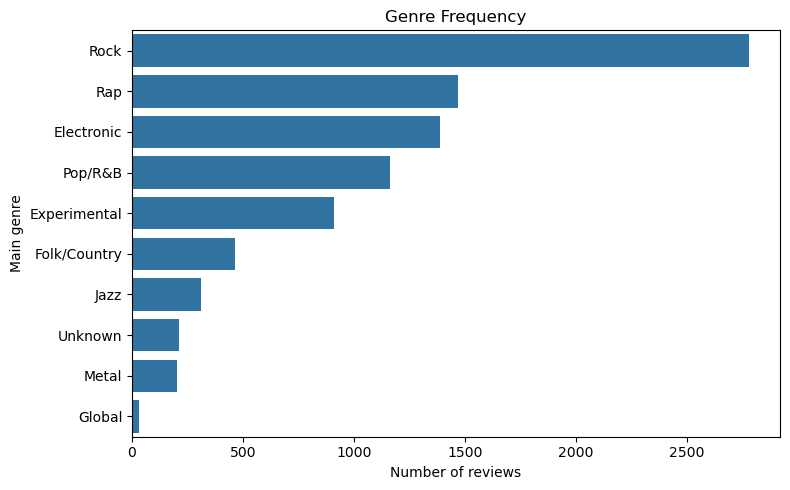

In [25]:
# Genre frequency
genre_counts = df["main_genre"].value_counts().reset_index()
genre_counts.columns = ["main_genre", "count"]

print(genre_counts.head())  # optional, just to check

sns.barplot(data=genre_counts, x="count", y="main_genre")
plt.title("Genre Frequency")
plt.xlabel("Number of reviews")
plt.ylabel("Main genre")
plt.tight_layout()
plt.show()